In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('3.1-3.4 shoplazza店铺数据 副本.xls')

In [3]:
df.head()

,店铺名,平台,订单编号,交易编号,状态,创建时间,付款时间,付款方式,币种,SKU,...,所属城市,邮寄地址,邮政编码,联系邮箱,物流公司,货运单号,退货原因,客户账号,退款时间,退货标识
0,hobbies.gshopper,Shoplazza,512937-GSG00002859,GSG00002859,待处理,2023-03-05 00:12:51,2023-03-04 23:59:01,credit_card,USD,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,...,Wayne City,12085 Aden Rd,62895,rfwebb@hamiltoncom.net,NaN,NaN,NaN,Flossie Webb,NaN,否
1,hobbies.gshopper,Shoplazza,512937-GSG00002858,GSG00002858,待处理,2023-03-05 00:12:52,2023-03-04 23:56:06,credit_card,USD,QPB-Green-With Sun Canopy-A0031426_Green_With ...,...,Pleasant Hill,14906 Knorpp Road,64080,sfclarke64@gmail.com,NaN,NaN,NaN,Suzanne Clarke,NaN,否
2,justforyou.gshopper,Shoplazza,512932-GSG00003417,GSG00003417,待处理,2023-03-05 00:07:59,2023-03-04 23:55:31,paypal,USD,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,...,Kingston,2 Nason Ln,03848,aeccorp@hotmail.com,NaN,NaN,NaN,Kasabian Frank,NaN,否
3,lifestyle.gshopper,Shoplazza,369866101145150162992,GSG00006656,待处理,2023-03-05 00:11:53,2023-03-04 23:55:23,paypal,USD,CZX-Festive Tulips-Buy 3 Free Shipping-A004132...,...,Rochdale,242 Hilltop Drive,OL112DY,carasteed@hotmail.com,NaN,NaN,NaN,Steed Eileen,NaN,否
4,hobbies.gshopper,Shoplazza,512937-GSG00002856,GSG00002856,待处理,2023-03-05 00:12:51,2023-03-04 23:50:27,paypal,USD,QPB-Green-With Sun Canopy-A0031426_Green_With ...,...,Ocean City,38 W 17th St,08226-2924,lynnt11@me.com,NaN,NaN,NaN,trabbold lynn,NaN,否


In [4]:
#把所有的空值按上一行的值填充
df.fillna(method = 'ffill',inplace = True)

In [5]:
#drop掉不需要的行
df.drop(['订单总金额（原币种）','采购总金额（CNY）',
         '广告费(原始货币)','VAT税费（原始货币）',
        '优惠金额（原始货币）','货运单号','退货原因','退款时间','退货标识','物流公司',
        '邮寄地址','邮政编码','订单利润(原始货币)','订单利润率','币种'],axis=1,inplace=True)

In [6]:
df.head(5)

,店铺名,平台,订单编号,交易编号,状态,创建时间,付款时间,付款方式,SKU,商品中文名称,...,原始商品销售单价,商品采购单价（CNY）,原始运费金额,客户姓名,电话1,国家,所属地区（省/州）,所属城市,联系邮箱,客户账号
0,hobbies.gshopper,Shoplazza,512937-GSG00002859,GSG00002859,待处理,2023-03-05 00:12:51,2023-03-04 23:59:01,credit_card,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,儿童充气趴圈-蓝色（带遮阳篷）,...,59.99,123.1005,7.99,Flossie Webb,+1 618 599 1031,United States,Illinois,Wayne City,rfwebb@hamiltoncom.net,Flossie Webb
1,hobbies.gshopper,Shoplazza,512937-GSG00002858,GSG00002858,待处理,2023-03-05 00:12:52,2023-03-04 23:56:06,credit_card,QPB-Green-With Sun Canopy-A0031426_Green_With ...,儿童充气趴圈-绿色（带遮阳篷）,...,59.99,122.8392,9.99,Suzanne Clarke,+1 816 686 1748,United States,Missouri,Pleasant Hill,sfclarke64@gmail.com,Suzanne Clarke
2,justforyou.gshopper,Shoplazza,512932-GSG00003417,GSG00003417,待处理,2023-03-05 00:07:59,2023-03-04 23:55:31,paypal,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,清洁泥膜-1罐,...,24.99,3.3303,6.99,Kasabian Frank,+1 603 608 6545,United States,New Hampshire,Kingston,aeccorp@hotmail.com,Kasabian Frank
3,lifestyle.gshopper,Shoplazza,369866101145150162992,GSG00006656,待处理,2023-03-05 00:11:53,2023-03-04 23:55:23,paypal,CZX-Festive Tulips-Buy 3 Free Shipping-A004132...,花束贺卡-郁金香,...,15.98,11.0000,6.99,Steed Eileen,+44 7838 181170,United Kingdom,New Hampshire,Rochdale,carasteed@hotmail.com,Steed Eileen
4,hobbies.gshopper,Shoplazza,512937-GSG00002856,GSG00002856,待处理,2023-03-05 00:12:51,2023-03-04 23:50:27,paypal,QPB-Green-With Sun Canopy-A0031426_Green_With ...,儿童充气趴圈-绿色（带遮阳篷）,...,59.99,122.8392,7.99,trabbold lynn,+1 610 505 8299,United States,New Jersey,Ocean City,lynnt11@me.com,trabbold lynn


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   店铺名          2376 non-null   object 
 1   平台           2376 non-null   object 
 2   订单编号         2376 non-null   object 
 3   交易编号         2376 non-null   object 
 4   状态           2376 non-null   object 
 5   创建时间         2376 non-null   object 
 6   付款时间         2376 non-null   object 
 7   付款方式         2376 non-null   object 
 8   SKU          2376 non-null   object 
 9   商品中文名称       2376 non-null   object 
 10  商品数量         2376 non-null   int64  
 11  原始商品销售单价     2376 non-null   float64
 12  商品采购单价（CNY）  2376 non-null   float64
 13  原始运费金额       2376 non-null   float64
 14  客户姓名         2376 non-null   object 
 15  电话1          2376 non-null   object 
 16  国家           2376 non-null   object 
 17  所属地区（省/州）    2376 non-null   object 
 18  所属城市         2376 non-null   object 
 19  联系邮箱  

In [7]:
#定义grab仅店铺名的string，以防后缀不一
def grabshopname(shopname):
    shopname = shopname.split('.')
    return shopname[0]

In [8]:
#apply function
df['店铺名'] = df['店铺名'].apply(lambda x : grabshopname(x))

In [10]:
#将payment改为dummy，这个command会重新create一个dataframe
payment_method_dm = pd.get_dummies(df['付款方式'], prefix = 'Payment method')

In [11]:
#concat the two strings
df = pd.concat([df, payment_method_dm],axis = 1)

In [12]:
#another way to get the dummies in one line
final_data = pd.get_dummies(loans, columns=cat_feats,drop_first = True)

NameError: name 'loans' is not defined

In [9]:
#确认timestamp的type
type(df['付款时间'].iloc[0])

str

In [10]:
#change string to timestamp
df['付款时间'] = pd.to_datetime(df['付款时间'])

In [11]:
#检查是否能grab单独的时间
time = df['付款时间'].iloc[0]
time.hour

23

In [12]:
#create new columns of date, hour and dayofweek
df['payment date'] = df['付款时间'].apply(lambda time: time.day)
df['payment hour'] = df['付款时间'].apply(lambda time: time.hour)
df['payment day_of_week'] = df['付款时间'].apply(lambda time: time.dayofweek)

In [13]:
#check dayoftime, how many data this includes
df['payment day_of_week'].value_counts()

payment day_of_week
2    717
4    631
3    617
5    411
Name: count, dtype: int64

In [14]:
#创建date的dictionary
datemap = {1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri'}

In [15]:
#create a new column indicating the char dayoftime
df['payment day of time char'] = df['payment day_of_week'].map(datemap)

In [16]:
#check if matched
df['payment day of time char']

0       Fri
1       Fri
2       Fri
3       Fri
4       Fri
       ... 
2371    Tue
2372    Tue
2373    Tue
2374    Tue
2375    Tue
Name: payment day of time char, Length: 2376, dtype: object

In [17]:
df.head(3)

,店铺名,平台,订单编号,交易编号,状态,创建时间,付款时间,付款方式,SKU,商品中文名称,...,电话1,国家,所属地区（省/州）,所属城市,联系邮箱,客户账号,payment date,payment hour,payment day_of_week,payment day of time char
0,hobbies,Shoplazza,512937-GSG00002859,GSG00002859,待处理,2023-03-05 00:12:51,2023-03-04 23:59:01,credit_card,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,儿童充气趴圈-蓝色（带遮阳篷）,...,+1 618 599 1031,United States,Illinois,Wayne City,rfwebb@hamiltoncom.net,Flossie Webb,4,23,5,Fri
1,hobbies,Shoplazza,512937-GSG00002858,GSG00002858,待处理,2023-03-05 00:12:52,2023-03-04 23:56:06,credit_card,QPB-Green-With Sun Canopy-A0031426_Green_With ...,儿童充气趴圈-绿色（带遮阳篷）,...,+1 816 686 1748,United States,Missouri,Pleasant Hill,sfclarke64@gmail.com,Suzanne Clarke,4,23,5,Fri
2,justforyou,Shoplazza,512932-GSG00003417,GSG00003417,待处理,2023-03-05 00:07:59,2023-03-04 23:55:31,paypal,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,清洁泥膜-1罐,...,+1 603 608 6545,United States,New Hampshire,Kingston,aeccorp@hotmail.com,Kasabian Frank,4,23,5,Fri


In [18]:
df.drop(['状态','创建时间','SKU','电话1'],axis = 1, inplace = True)

In [97]:
df.head(3)

,店铺名,平台,订单编号,交易编号,付款时间,付款方式,SKU,商品数量,原始商品销售单价,商品采购单价（CNY）,...,客户姓名,国家,所属地区（省/州）,所属城市,联系邮箱,客户账号,payment date,payment hour,payment day_of_week,payment day of time char
0,hobbies,Shoplazza,512937-GSG00002859,GSG00002859,2023-03-04 23:59:01,credit_card,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,1,59.99,123.1005,...,Flossie Webb,United States,Illinois,Wayne City,rfwebb@hamiltoncom.net,Flossie Webb,4,23,5,Fri
1,hobbies,Shoplazza,512937-GSG00002858,GSG00002858,2023-03-04 23:56:06,credit_card,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,122.8392,...,Suzanne Clarke,United States,Missouri,Pleasant Hill,sfclarke64@gmail.com,Suzanne Clarke,4,23,5,Fri
2,justforyou,Shoplazza,512932-GSG00003417,GSG00003417,2023-03-04 23:55:31,paypal,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,1,24.99,3.3303,...,Kasabian Frank,United States,New Hampshire,Kingston,aeccorp@hotmail.com,Kasabian Frank,4,23,5,Fri


In [19]:
df['商品采购单价（USD）'] = df['商品采购单价（CNY）'].apply(lambda x:x/4)

In [20]:
df['商品采购单价（USD）'] 

0       30.775125
1       30.709800
2        0.832575
3        2.750000
4       30.709800
          ...    
2371    21.500000
2372    16.387500
2373     3.937500
2374     3.937500
2375    10.162500
Name: 商品采购单价（USD）, Length: 2376, dtype: float64

In [21]:
df.drop('商品采购单价（CNY）', axis = 1, inplace=True)

In [28]:
df.head()

,店铺名,平台,订单编号,交易编号,付款时间,SKU,商品数量,原始商品销售单价,原始运费金额,客户姓名,...,客户账号,Payment method_credit_card,Payment method_custom,Payment method_paypal,Payment method_zero_pay,payment date,payment hour,payment day_of_week,payment day of time char,商品采购单价（USD）
0,hobbies,Shoplazza,512937-GSG00002859,GSG00002859,2023-03-04 23:59:01,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,1,59.99,7.99,Flossie Webb,...,Flossie Webb,True,False,False,False,4,23,5,Fri,30.775125
1,hobbies,Shoplazza,512937-GSG00002858,GSG00002858,2023-03-04 23:56:06,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,9.99,Suzanne Clarke,...,Suzanne Clarke,True,False,False,False,4,23,5,Fri,30.709800
2,justforyou,Shoplazza,512932-GSG00003417,GSG00003417,2023-03-04 23:55:31,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,1,24.99,6.99,Kasabian Frank,...,Kasabian Frank,False,False,True,False,4,23,5,Fri,0.832575
3,lifestyle,Shoplazza,369866101145150162992,GSG00006656,2023-03-04 23:55:23,CZX-Festive Tulips-Buy 3 Free Shipping-A004132...,1,15.98,6.99,Steed Eileen,...,Steed Eileen,False,False,True,False,4,23,5,Fri,2.750000
4,hobbies,Shoplazza,512937-GSG00002856,GSG00002856,2023-03-04 23:50:27,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,7.99,trabbold lynn,...,trabbold lynn,False,False,True,False,4,23,5,Fri,30.709800


In [22]:
df['Total Cost'] = df['原始运费金额'] + df['商品采购单价（USD）']

In [23]:
df['Profit'] = df['原始商品销售单价'] - df['Total Cost']

In [103]:
df.head()

,店铺名,平台,订单编号,交易编号,付款时间,付款方式,SKU,商品数量,原始商品销售单价,原始运费金额,...,所属城市,联系邮箱,客户账号,payment date,payment hour,payment day_of_week,payment day of time char,商品采购单价（USD）,Total Cost,Profit
0,hobbies,Shoplazza,512937-GSG00002859,GSG00002859,2023-03-04 23:59:01,credit_card,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,1,59.99,7.99,...,Wayne City,rfwebb@hamiltoncom.net,Flossie Webb,4,23,5,Fri,30.775125,38.765125,21.224875
1,hobbies,Shoplazza,512937-GSG00002858,GSG00002858,2023-03-04 23:56:06,credit_card,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,9.99,...,Pleasant Hill,sfclarke64@gmail.com,Suzanne Clarke,4,23,5,Fri,30.709800,40.699800,19.290200
2,justforyou,Shoplazza,512932-GSG00003417,GSG00003417,2023-03-04 23:55:31,paypal,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,1,24.99,6.99,...,Kingston,aeccorp@hotmail.com,Kasabian Frank,4,23,5,Fri,0.832575,7.822575,17.167425
3,lifestyle,Shoplazza,369866101145150162992,GSG00006656,2023-03-04 23:55:23,paypal,CZX-Festive Tulips-Buy 3 Free Shipping-A004132...,1,15.98,6.99,...,Rochdale,carasteed@hotmail.com,Steed Eileen,4,23,5,Fri,2.750000,9.740000,6.240000
4,hobbies,Shoplazza,512937-GSG00002856,GSG00002856,2023-03-04 23:50:27,paypal,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,7.99,...,Ocean City,lynnt11@me.com,trabbold lynn,4,23,5,Fri,30.709800,38.699800,21.290200


In [24]:
df.to_excel('total sales data cleaned.xlsx', index=False)

In [308]:
byshopnDate.head() #groupby by不起来，因为sku不一样

,交易编号,SKU,商品数量,原始商品销售单价,原始运费金额,客户姓名,国家,所属地区（省/州）,所属城市,payment date,payment hour,payment day_of_week,payment day of time char,商品采购单价（USD）,Total Cost,Profit
店铺名,,,,,,,,,,,,,,,,
amazing,GSG00002637GSG00002635GSG00002630GSG00002630GS...,DQYL04-Same Picture Color-3XL-A0032837_Same Pi...,19,621.3858,98.3424,Workman MargaretCaster aprilKelly RuppKelly Ru...,United StatesUnited StatesUnited StatesUnited ...,ArkansasFloridaTexasTexasTexasTexasKansasTenne...,ConwayCape CoralSpringSpringSpringSpringHavens...,55,209,74,FriFriFriFriFriFriThuThuThuThuThuWedWedWedWedW...,164.291475,262.633875,358.751925
beauty,GSG00005173GSG00005173GSG00005173GSG00005172GS...,CHX--1pc-A0028479_1pcCHX--$22.98⭐️1 Bottle-A00...,18,349.8178,113.9178,Vika ShapiroVika ShapiroVika ShapiroChase Marg...,IsraelIsraelIsraelAustraliaIsraelCanadaSpainSp...,PennsylvaniaPennsylvaniaPennsylvaniaVictoriaNe...,JerusalemJerusalemJerusalemFootscrayפתח תקווהM...,42,213,58,FriFriFriFriFriFriThuThuWedWedWedWedTueTueTueTue,22.011850,135.929650,213.888150
bigdeal,GSG00007347GSG00007347GSG00007344GSG00007343GS...,cky-Beige-S-Regular-A0012331_Beige_S_Regularck...,162,4700.5379,807.7644,Frame LisaFrame LisaBecker CaitlynBeligov Alic...,United StatesUnited StatesUnited StatesSwitzer...,PennsylvaniaPennsylvaniaCaliforniaCaliforniaNe...,PhoenixvillePhoenixvilleMarina Del ReyBaselWes...,407,2050,561,FriFriFriFriFriFriFriFriFriFriFriFriFriFriFriF...,1422.851925,2230.616325,2469.921575
boutique,GSG00002721GSG00002703GSG00002699GSG00002687GS...,{XLP}-Black-300-1PC-A0025452_Black_300_1PC{XLP...,34,721.0401,102.5677,Klein SimonC Alan PrinceSalma KhalilLeyla Alid...,IsraelAustraliaUnited KingdomSwitzerlandUnited...,FloridaQueenslandQueenslandAlabamaNew JerseyTe...,HolonUpper CabooltureBradfordChamElizabethAyle...,56,272,80,FriFriFriFriFriFriThuThuThuThuWedWedWedWedWedW...,113.550175,216.117875,504.922225
bra,GSG00004521GSG00004118GSG00004508GSG00004505GS...,Le--Black-40-DD(E)-A0025784_Black_40_DD(E)CPNY...,38,977.4431,208.8369,Marycarmen Loza DavilaNicola Van ZylFIGUEROA E...,MexicoSouth AfricaMexicoAustraliaAustraliaMexi...,MéxicoNorthern CapeBaja CaliforniaWestern Aust...,NaucalpanUbuntuENSENADAMandurahCoolbiniaMazatl...,75,301,111,FriFriThuThuThuThuThuThuThuThuThuThuWedWedWedW...,235.202025,444.038925,533.404175


In [392]:
df.drop(['付款时间','平台','客户账号','联系邮箱'],axis = 1, inplace = True)

In [393]:
df.drop(['订单编号'],axis = 1, inplace = True)

In [394]:
byshops = df.groupby('店铺名')

In [395]:
transactioncounts = byshops.count()
week_tran = pd.DataFrame(transactioncounts['SKU'])
week_tran

,SKU
店铺名,
amazing,19
beauty,16
bigdeal,154
boutique,24
bra,36
chiccloth,2
dailylife,74
decoration,215
dressup,4


In [396]:
byshopsndate = df.groupby(['店铺名','payment day of time char'])
byshopsndate.count()

交易编号  SKU  商品数量  原始商品销售单价  原始运费金额  客户姓名  国家  \
店铺名     payment day of time char                                                
amazing Fri                          6    6     6         6       6     6   6   
        Thu                          5    5     5         5       5     5   5   
        Wed                          8    8     8         8       8     8   8   
beauty  Fri                          6    6     6         6       6     6   6   
        Thu                          2    2     2         2       2     2   2   
...                                ...  ...   ...       ...     ...   ...  ..   
vanilla Tue                          3    3     3         3       3     3   3   
        Wed                         20   20    20        20      20    20  20   
velvet  Thu                          1    1     1         1       1     1   1   
        Tue                          1    1     1         1       1     1   1   
        Wed                          1    1     1         1       1     1   1   

                                  所属地区（省/州）  所属城市  Payment method_credit_card  \
店铺名     payment day of time char                                                
amazing Fri                               6     6                           6   
        Thu                               5     5                           5   
        Wed                               8     8                           8   
beauty  Fri                               6     6                           6   
        Thu                               2     2                           2   
...                                     ...   ...                         ...   
vanilla Tue                               3     3                           3   
        Wed                              20    20                          20   
velvet  Thu                               1     1                           1   
        Tue                               1     1                           1   
        Wed                               1     1                           1   

                                  Payment method_custom  \
店铺名     payment day of time char                          
amazing Fri                                           6   
        Thu                                           5   
        Wed                                           8   
beauty  Fri                                           6   
        Thu                                           2   
...                                                 ...   
vanilla Tue                                           3   
        Wed                                          20   
velvet  Thu                                           1   
        Tue                                           1   
        Wed                                           1   

                                  Payment method_paypal  \
店铺名     payment day of time char                          
amazing Fri                                           6   
        Thu                                           5   
        Wed                                           8   
beauty  Fri                                           6   
        Thu                                           2   
...                                                 ...   
vanilla Tue                                           3   
        Wed                                          20   
velvet  Thu                                           1   
        Tue                                           1   
        Wed                                           1   

                                  Payment method_zero_pay  payment date  \
店铺名     payment day of time char                                          
amazing Fri                                             6             6   
        Thu                                             5             5   
        Wed                                             8             8   
beauty  Fri    

In [397]:
transactioncount_day = byshopsndate.count()
transactioncount_day_matrix =  transactioncount_day['交易编号'].unstack()

In [398]:
transactioncount_day_matrix

payment day of time char,Fri,Thu,Tue,Wed
店铺名,,,,
amazing,6.0,5.0,NaN,8.0
beauty,6.0,2.0,4.0,4.0
bigdeal,44.0,50.0,39.0,21.0
boutique,6.0,4.0,8.0,6.0
bra,2.0,10.0,11.0,13.0
chiccloth,NaN,NaN,1.0,1.0
dailylife,19.0,10.0,28.0,17.0
decoration,37.0,55.0,69.0,54.0
dressup,NaN,3.0,NaN,1.0


In [399]:
transactioncount_day_matrix = transactioncount_day_matrix.fillna(0)

<Axes: xlabel='payment day of time char', ylabel='店铺名'>

/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38138 (\N{CJK UNIFIED IDEOGRAPH-94FA}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38138 (\N{CJK UNIFIED IDEOGRAPH-94FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huqi/anacond

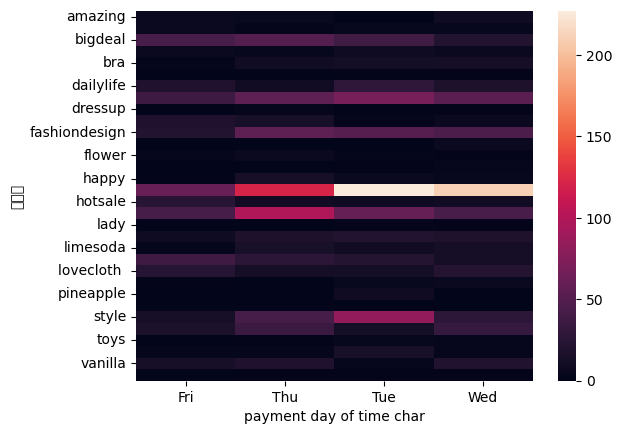

In [400]:
sns.heatmap(transactioncount_day_matrix)

In [401]:
byshopnDate.sum()

交易编号                        GSG00002637GSG00002635GSG00002630GSG00002630GS...
SKU                         DQYL04-Same Picture Color-3XL-A0032837_Same Pi...
商品数量                                                                     2655
原始商品销售单价                                                           79013.3423
原始运费金额                                                             13331.5091
客户姓名                        Workman MargaretCaster aprilKelly RuppKelly Ru...
国家                          United StatesUnited StatesUnited StatesUnited ...
所属地区（省/州）                   ArkansasFloridaTexasTexasTexasTexasKansasTenne...
所属城市                        ConwayCape CoralSpringSpringSpringSpringHavens...
payment date                                                             5488
payment hour                                                            25832
payment day_of_week                                                      7864
payment day of time char    FriFriFriFriFriFriThuThuThuThuThuWed

In [402]:
profitbyshopnDate = pd.DataFrame(byshopnDate['Profit'])

In [403]:
profitbyshopnDate

,Profit
店铺名,
amazing,358.751925
beauty,213.888150
bigdeal,2469.921575
boutique,504.922225
bra,533.404175
chiccloth,57.550000
dailylife,1159.330025
decoration,3731.603525
dressup,60.289200


In [404]:
byshopndates = df.groupby(['店铺名','payment day of time char'])

In [405]:
byshopndates_sum = byshopndates.sum()

In [406]:
profitbyshopdate = pd.DataFrame(byshopndates_sum['Profit']).unstack()
profitbyshopdate = profitbyshopdate.fillna(0)
profitbyshopdate

Profit                                       
payment day of time char          Fri          Thu          Tue          Wed
店铺名                                                                         
amazing                    179.417400   105.861300     0.000000    73.473225
beauty                      95.014000    28.418225    43.158275    47.297650
bigdeal                    676.208350   827.792075   597.414625   368.506525
boutique                   125.454150    99.157500   165.089100   115.221475
bra                         25.475000   133.307000   183.940725   190.681450
chiccloth                    0.000000     0.000000    20.500000    37.050000
dailylife                  372.114025   152.961275   427.649875   206.604850
decoration                 623.589150   953.413625  1182.247800   972.352950
dressup                      0.000000    50.579200     0.000000     9.710000
fantastic                  104.982500    74.449200    23.640000    56.127600
fashiondesign              455.513400  1230.064475  1118.593150  1010.781800
flashdeals                   0.000000     0.000000     0.000000   121.902800
flower                      72.840000   129.697900    32.000000    10.000000
furniture                    0.000000     0.000000    -0.452500    21.272500
happy                       26.000000   165.217200   133.939900    86.704200
hobbies                   1231.275350  2136.641600  3762.406625  3577.700125
hotsale                    157.217250    94.544300    69.610100    75.974400
justforyou                 873.678550  1549.922750  1678.536850  1096.285100
lady                         0.000000     0.000000    57.330000     8.281675
lifestyle                   85.774500   167.991400   314.427600   279.670075
limesoda                    30.801525   147.279750    96.782425   142.664150
love                       825.434475   573.296375   486.624000   310.522500
lovecloth                  319.842525   204.882175   179.777750   194.479325
palmtree                    24.740000     0.000000    85.084300   127.630000
pineapple                    0.000000     0.000000    36.770800     0.000000
pretty                       0.000000    -3.000000     0.000000     0.000000
style                      138.823900   395.218000   940.609525   255.711000
sweethome                  194.680575   408.019200   168.144175   461.124425
toys                         0.000000     8.842175    51.837125    63.330000
trending                    76.014700    38.151450   141.961450    35.802500
vanilla                     94.551450   144.673050    25.413100   137.405900
velvet                       0.000000     6.869400     6.709450     7.770000

<Axes: xlabel='None-payment day of time char', ylabel='店铺名'>

/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 38138 (\N{CJK UNIFIED IDEOGRAPH-94FA}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/events.py:93: UserWarning: Glyph 21517 (\N{CJK UNIFIED IDEOGRAPH-540D}) missing from current font.
  func(*args, **kwargs)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huqi/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 38138 (\N{CJK UNIFIED IDEOGRAPH-94FA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/huqi/anacond

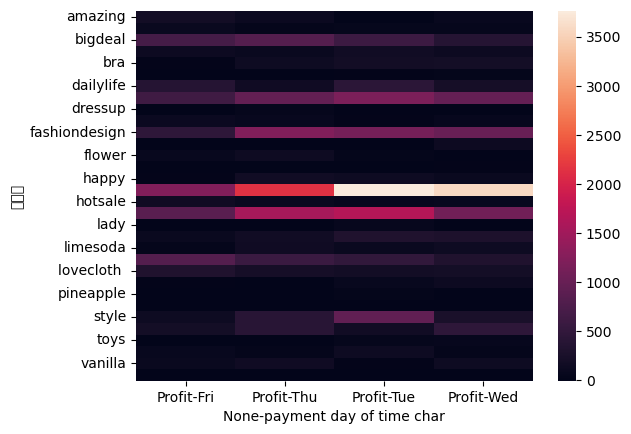

In [332]:
sns.heatmap(profitbyshopdate)

In [336]:
byshopndates_sum

交易编号  \
店铺名     payment day of time char                                                      
amazing Fri                       GSG00002637GSG00002635GSG00002630GSG00002630GS...   
        Thu                       GSG00002629GSG00002628GSG00002626GSG00002621GS...   
        Wed                       GSG00002618GSG00002616GSG00002616GSG00002615GS...   
beauty  Fri                       GSG00005173GSG00005173GSG00005173GSG00005172GS...   
        Thu                                                  GSG00004997GSG00004997   
...                                                                             ...   
vanilla Tue                                       GSG00000777GSG00000776GSG00000775   
        Wed                       GSG00000814GSG00000811GSG00000810GSG00000808GS...   
velvet  Thu                                                             GSG00002278   
        Tue                                                             GSG00001676   
        Wed                                                             GSG00002273   

                                                                                SKU  \
店铺名     payment day of time char                                                      
amazing Fri                       DQYL04-Same Picture Color-3XL-A0032837_Same Pi...   
        Thu                       DQYL04-Denim Blue-XL-A0032882_Denim Blue_XLDQY...   
        Wed                       DQYL04-Red-M-A0033133_Red_MDQYL04-Picture Colo...   
beauty  Fri                       CHX--1pc-A0028479_1pcCHX--$22.98⭐️1 Bottle-A00...   
        Thu                       CHX--1PSC -A0028565_1PSCCHX--1pc - USD19.97-A0...   
...                                                                             ...   
vanilla Tue                       WBZQMZ020704-One-A002796_OneWBZQMZ020704-One-A...   
        Wed                       WBZQMZ020704-One-A002796_OneQMZ-25MM-WHITE-A00...   
velvet  Thu                                                LPC-Brown-A0036389_Brown   
        Tue                       XB-AUDI-10PCS(Get 30% Off)-A0024970_AUDI_10PCS...   
        Wed                                                LPC-White-A0036384_White   

                                  商品数量  原始商品销售单价    原始运费金额  \
店铺名     payment day of time char                             
amazing Fri                          6  256.9300   13.9800   
        Thu                          5  194.4141   36.0518   
        Wed                          8  170.0417   48.3106   
beauty  Fri                          6  141.3585   40.0545   
        Thu                          2   42.7658   13.0084   
...                                ...       ...       ...   
vanilla Tue                          5   53.6700   11.9800   
        Wed                         25  346.7808  125.8085   
velvet  Thu                          2   17.3398    7.3304   
        Tue                          1   13.5213    6.3587   
        Wed                          1   18.9000    7.9900   

                                                                               客户姓名  \
店铺名     payment day of time char                                                      
amazing Fri                       Workman MargaretCaster aprilKelly RuppKelly Ru...   
        Thu                       Judith WattonSawyer JudyIngramEpperson Coollee...   
        Wed                       Renaudette TammyMoody HeatherMoody HeatherStep...   
beauty  Fri                       Vika ShapiroVika ShapiroVika ShapiroChase Marg...   
        Thu                                                      Mily OlisMily Olis   
...                                                                             ...   
vanilla Tue                       David OfferMorissette FrancinePartington Jennifer   
        Wed                       Armstrong LynneAmato JanetAmato JanetQuinnell ...   
velvet  Thu                                                         Stevens Ludmila   
        Tue                                        

In [407]:
df.head()

,店铺名,交易编号,SKU,商品数量,原始商品销售单价,原始运费金额,客户姓名,国家,所属地区（省/州）,所属城市,...,Payment method_custom,Payment method_paypal,Payment method_zero_pay,payment date,payment hour,payment day_of_week,payment day of time char,商品采购单价（USD）,Total Cost,Profit
0,hobbies,GSG00002859,QPB-Blue-With Sun Canopy-A0031430_Blue_With Su...,1,59.99,7.99,Flossie Webb,United States,Illinois,Wayne City,...,False,False,False,4,23,5,Fri,30.775125,38.765125,21.224875
1,hobbies,GSG00002858,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,9.99,Suzanne Clarke,United States,Missouri,Pleasant Hill,...,False,False,False,4,23,5,Fri,30.709800,40.699800,19.290200
2,justforyou,GSG00003417,YAN--1 Bottle - $24.99-A0028910_1 Bottle - $24.99,1,24.99,6.99,Kasabian Frank,United States,New Hampshire,Kingston,...,False,True,False,4,23,5,Fri,0.832575,7.822575,17.167425
3,lifestyle,GSG00006656,CZX-Festive Tulips-Buy 3 Free Shipping-A004132...,1,15.98,6.99,Steed Eileen,United Kingdom,New Hampshire,Rochdale,...,False,True,False,4,23,5,Fri,2.750000,9.740000,6.240000
4,hobbies,GSG00002856,QPB-Green-With Sun Canopy-A0031426_Green_With ...,1,59.99,7.99,trabbold lynn,United States,New Jersey,Ocean City,...,False,True,False,4,23,5,Fri,30.709800,38.699800,21.290200


<Axes: xlabel='payment day of time char', ylabel='Profit'>

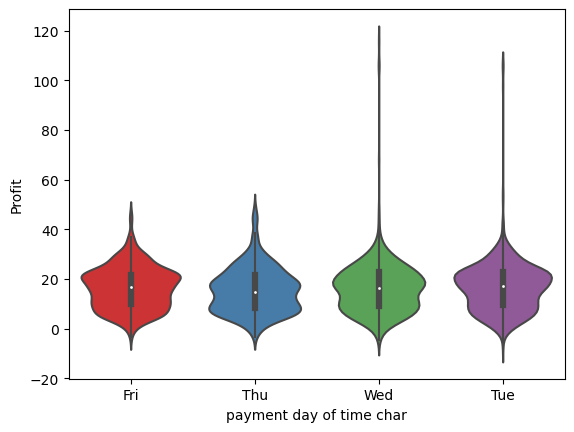

In [411]:
sns.violinplot(x="payment day of time char", y="Profit", data=df,split=True,palette='Set1')

In [54]:
byshopsnhour = df.groupby('payment hour')
saleshour = byshopsnhour.count()['平台'].sort_values(ascending = False)

In [70]:
saleshour
x = saleshour.index.tolist()

In [71]:
y = saleshour.values.tolist()

In [73]:
dic = {x:y}

TypeError: unhashable type: 'list'

<Axes: >

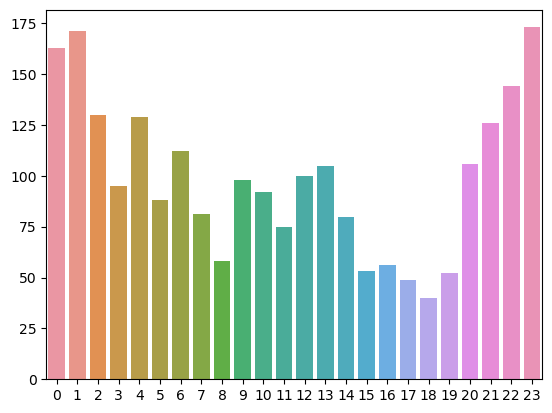

In [72]:
sns.barplot(x=x, y=y)